In [2]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import trange
import numba as nb

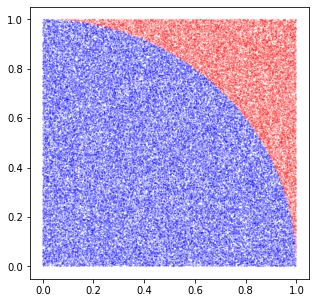

In [5]:
def plot_concept(samples=1_000_000):
    plt.figure(figsize=(5,5))
    radius = 1
    xy_off  = np.random.random([samples,2])
    xy = radius*xy_off
    xy2 = xy**2
    r2 = np.sum(xy2, axis=1)
    # pi = radius**2*np.sum(r2<=1)/samples
    col  = np.full(samples, 'blue')
    col[r2>1] = 'red'
    plt.scatter(xy[:,0], xy[:,1],color=col, s=0.01)
    plt.show()

plot_concept(100_000)

In [8]:
# @nb.jit(nopython=True)
def est_pi(samples=1_000_000):
    radius = 2
    xy_off  = np.random.random([samples,2])
    xy = radius*xy_off
    xy2 = xy**2
    r2 = np.sum(xy2, axis=1)
    pi = 4*radius**2*np.sum(r2<=1)/samples
    return pi
    

In [9]:
nmbr = 1_000
pis = np.full(nmbr, 0.0)

t = trange(nmbr)
for i in t:
    pis[i] = est_pi()
    pi_cur = np.sum(pis[0:i+1])/(i+1)
    t.set_description("pi = {:0.7f}".format(pi_cur)
                     + ", " +
                     "off = {:0.7f}".format(np.abs(pi_cur-np.pi))
                     )
    # t.refresh()
   

pi = 3.141193:  23%|██▎       | 234/1000 [00:07<00:23, 32.98it/s]


KeyboardInterrupt: 